## Import Libraries

In [81]:
# import requirement libraries and tools
import os
from tensorflow import keras
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style= "darkgrid", color_codes = True)
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import matplotlib.pyplot as plt
import random
from tensorflow.keras.preprocessing.image import load_img, img_to_array

## Create a dataframe with the Images and Label

In [82]:
import os
import pandas as pd
from PIL import Image

# Specify the path to the dataset folder
dataset_path = '/Users/nithyasanthoshini/Desktop/Innomatics/Deep Learning/Rice_Image_Dataset'

# Initialize empty lists for storing the images and labels
images = []
labels = []

# Loop over the subfolders in the dataset
for subfolder in os.listdir(dataset_path):
    
    subfolder_path = os.path.join(dataset_path, subfolder)
    if not os.path.isdir(subfolder_path):
        continue
  
  # Loop over the images in the subfolder
    for image_filename in os.listdir(subfolder_path):
       # Load the image and store it in the images list
        image_path = os.path.join(subfolder_path, image_filename)
        images.append(image_path)
    
        # Store the label for the image in the labels list
        labels.append(subfolder)
 
 # Create a pandas DataFrame from the images and labels
df = pd.DataFrame({'image': images, 'label': labels})

## EDA

In [83]:
df.head()

,image,label
0,/Users/nithyasanthoshini/Desktop/Innomatics/De...,Karacadag
1,/Users/nithyasanthoshini/Desktop/Innomatics/De...,Karacadag
2,/Users/nithyasanthoshini/Desktop/Innomatics/De...,Karacadag
3,/Users/nithyasanthoshini/Desktop/Innomatics/De...,Karacadag
4,/Users/nithyasanthoshini/Desktop/Innomatics/De...,Karacadag


In [84]:
df

,image,label
0,/Users/nithyasanthoshini/Desktop/Innomatics/De...,Karacadag
1,/Users/nithyasanthoshini/Desktop/Innomatics/De...,Karacadag
2,/Users/nithyasanthoshini/Desktop/Innomatics/De...,Karacadag
3,/Users/nithyasanthoshini/Desktop/Innomatics/De...,Karacadag
4,/Users/nithyasanthoshini/Desktop/Innomatics/De...,Karacadag
...,...,...
74995,/Users/nithyasanthoshini/Desktop/Innomatics/De...,Jasmine
74996,/Users/nithyasanthoshini/Desktop/Innomatics/De...,Jasmine
74997,/Users/nithyasanthoshini/Desktop/Innomatics/De...,Jasmine
74998,/Users/nithyasanthoshini/Desktop/Innomatics/De...,Jasmine


In [85]:
df['label'].unique()

array(['Karacadag', 'Ipsala', 'Arborio', 'Basmati', 'Jasmine'],
      dtype=object)

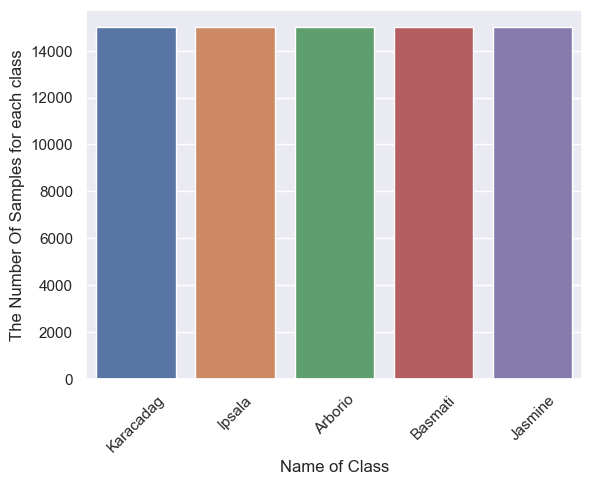

In [86]:
# plot the classes
ax = sns.countplot(x=df.label)

# Set labels and titles
ax.set_xlabel("Name of Class")
ax.set_ylabel("The Number Of Samples for each class")

# Rotate x-axis labels if needed
plt.xticks(rotation=45)

# Display the plot
plt.show()

In [87]:
df = pd.DataFrame({'image': images, 'label': labels})

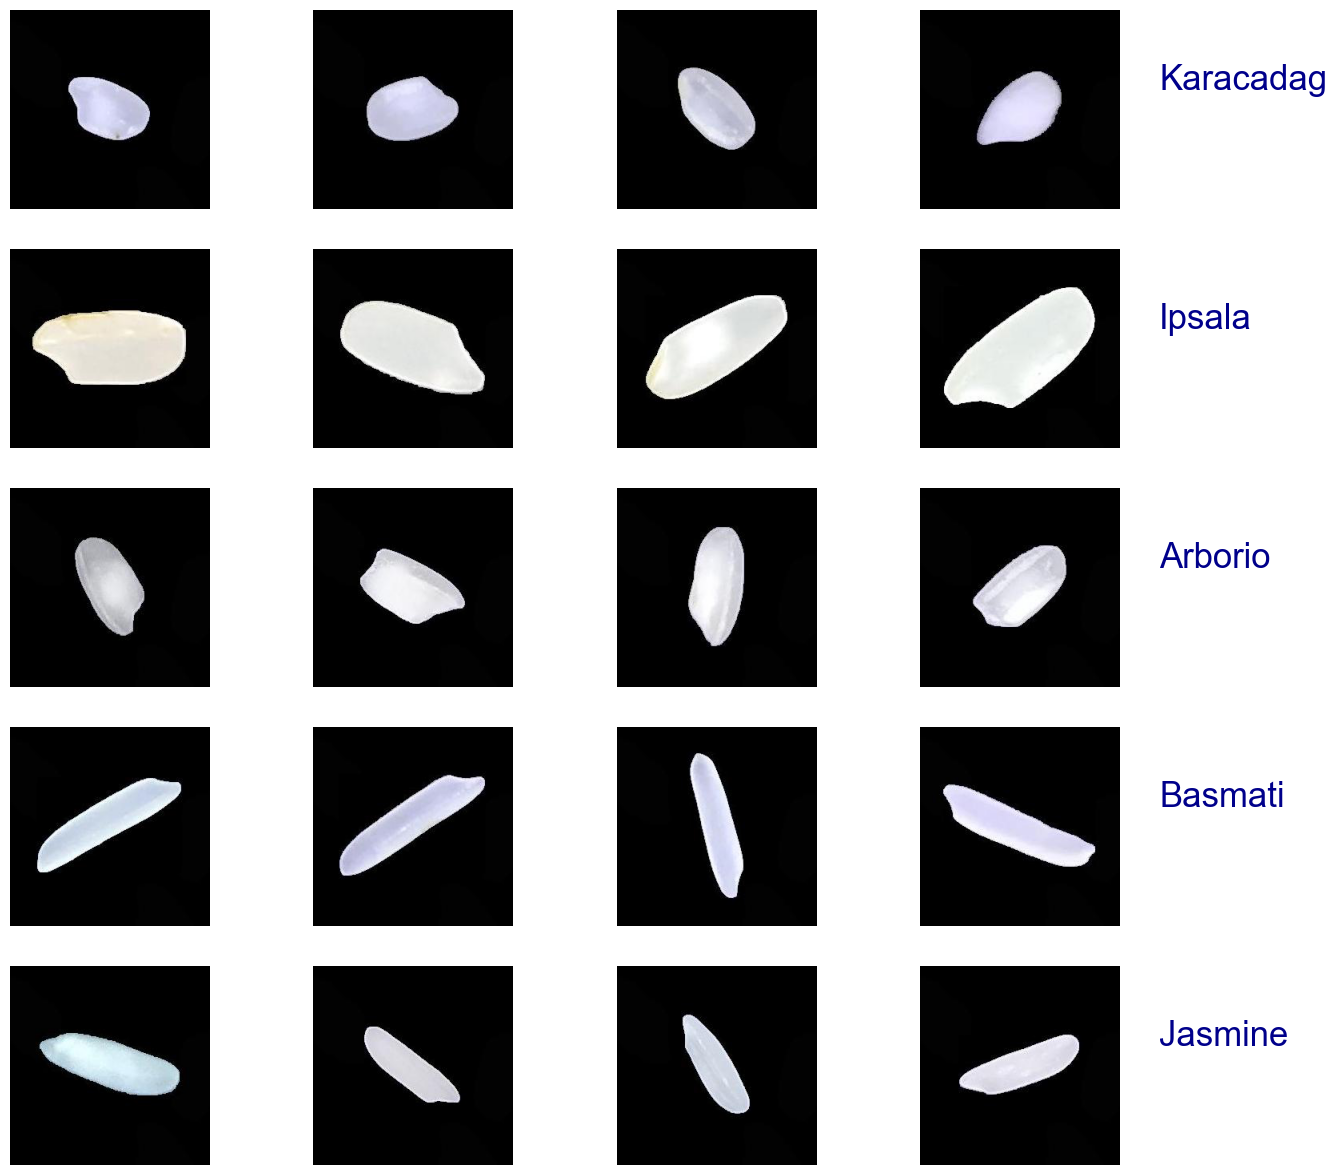

In [88]:
from matplotlib.gridspec import GridSpec
# Create figure and grid of subplots
fig = plt.figure(figsize=(15, 15))
gs = GridSpec(5, 4, figure=fig)

# Loop through each unique category in the DataFrame
for i, category in enumerate(df['label'].unique()):
    # Get the filepaths for the first four images in the category
    filepaths = df[df['label'] == category]['image'].values[:4]
    
    # Loop through the filepaths and add an image to each subplot
    for j, filepath in enumerate(filepaths):
        ax = fig.add_subplot(gs[i, j])
        ax.imshow(plt.imread(filepath))
        ax.axis('off')
    
    # Add a label to the bottom of the subplot grid
    ax.text(300, 100, category, fontsize=25, color='darkblue')

plt.show()

## Split Data into Train and Test 

In [89]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df['image'], df['label'], test_size=0.2, random_state=42)

# Create a dataframe for the training data
df_train = pd.DataFrame({'image': X_train, 'label': y_train})

# Create a dataframe for the test data
df_test = pd.DataFrame({'image': X_test, 'label': y_test})

# Encode the labels
encoder = LabelEncoder()
y_train = encoder.fit_transform(y_train)
y_test = encoder.transform(y_test)

##  Data Augmentation
To streamline the preprocessing of our images, we took the following steps:

we created generators for both the training and testing datasets. These generators allow us to efficiently handle and manipulate the data during the training and testing phases.

to enhance the diversity and robustness of our training data, we applied data augmentation techniques specifically to the training dataset. This augmentation process introduces variations in the images by applying transformations such as rotation, scaling, and flipping. By doing so, we expand the dataset and enable our model to learn from a wider range of image variations.

Additionally, we standardized the image dimensions by reshaping them to a uniform size of 50x50 pixels. This resizing ensures that all images in the dataset have consistent dimensions, facilitating the subsequent processing and analysis stages.

In [90]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
# Set the image size and batch size
image_size = (50, 50)
batch_size = 32

# Create an ImageDataGenerator object with data augmentation options for image preprocessing
datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=45,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)


# Create a generator for the training data
train_generator = datagen.flow_from_dataframe(
    df_train,
    x_col='image',
    y_col='label',
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=True
)

# Create a generator for the test data
test_generator = datagen.flow_from_dataframe(
    df_test,
    x_col='image',
    y_col='label',
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False
)

Found 60000 validated image filenames belonging to 5 classes.
Found 15000 validated image filenames belonging to 5 classes.


## Training Model 

In [91]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
# Set the input shape for the model
input_shape = (50, 50, 3)

# Create a Sequential model
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(5, activation='softmax'))

In [92]:
# Compile the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [93]:
# Train the model on the training data
history = model.fit(train_generator,epochs=5,validation_data=test_generator)

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 85s 45ms/step - accuracy: 0.7645 - loss: 0.5722 - val_accuracy: 0.9171 - val_loss: 0.2024
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 89s 47ms/step - accuracy: 0.9481 - loss: 0.1458 - val_accuracy: 0.9588 - val_loss: 0.1123
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 92s 49ms/step - accuracy: 0.9614 - loss: 0.1077 - val_accuracy: 0.9618 - val_loss: 0.1042
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 99s 53ms/step - accuracy: 0.9650 - loss: 0.0987 - val_accuracy: 0.9773 - val_loss: 0.0648
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 100s 53ms/step - accuracy: 0.9722 - loss: 0.0777 - val_accuracy: 0.9749 - val_loss: 0.0674


In [94]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)               │ (None, 48, 48, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 24, 24, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 22, 22, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 11, 11, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 7744)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │       991,360 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 5)              │           645 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,034,193 (11.57 MB)

 Trainable params: 1,011,397 (3.86 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2,022,796 (7.72 MB)

## Evaluate The Model 

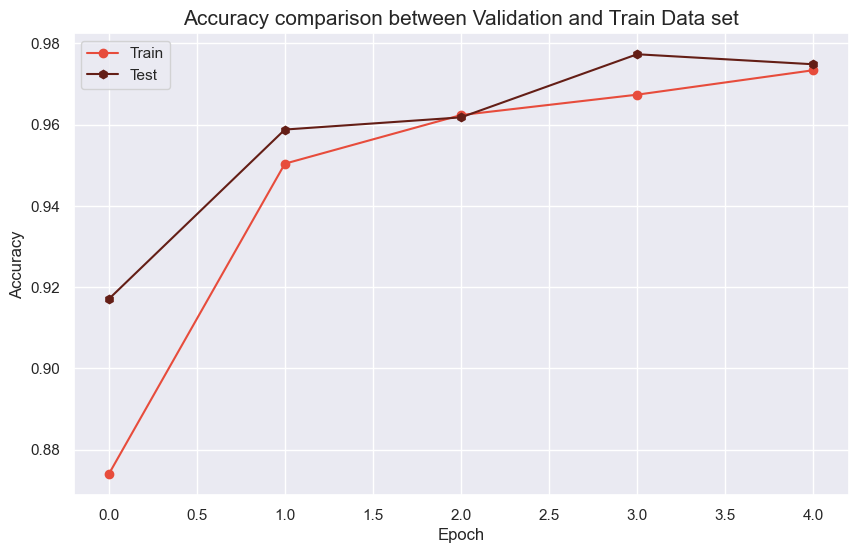

In [95]:
#Accuracy comparison between Validation and Train Data set
plt.figure(figsize=(10,6))
plt.plot(history.history['accuracy'],color="#E74C3C",marker='o')
plt.plot(history.history['val_accuracy'],color='#641E16',marker='h')
plt.title('Accuracy comparison between Validation and Train Data set',fontsize=15)
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='best')
plt.show()

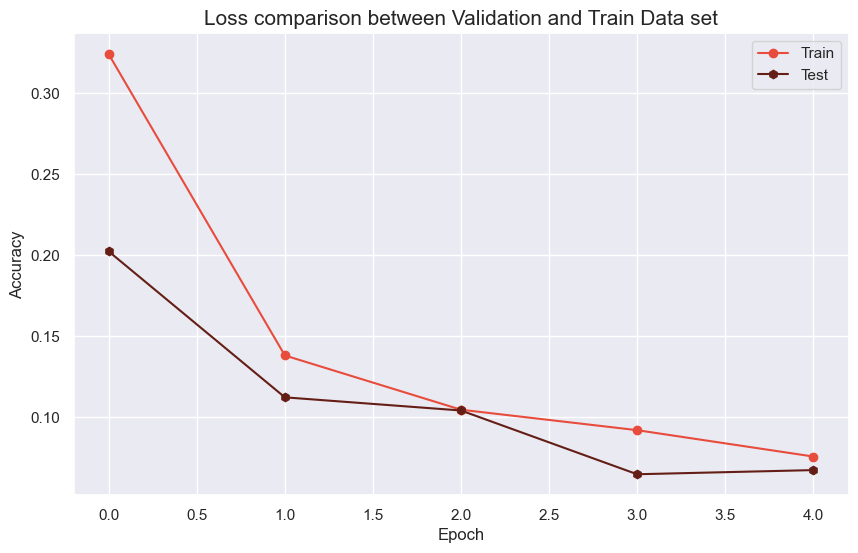

In [96]:
#Loss comparison between Validation and Train Data set
plt.figure(figsize=(10,6))
plt.plot(history.history['loss'],color="#E74C3C",marker='o')
plt.plot(history.history['val_loss'],color='#641E16',marker='h')
plt.title('Loss comparison between Validation and Train Data set',fontsize=15)
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='best')
plt.show()

In [97]:
# Evaluate the model on the test data
metrics = model.evaluate(test_generator)
# Print the accuracy of the model
print('Accuracy:', metrics[1])

469/469 ━━━━━━━━━━━━━━━━━━━━ 14s 30ms/step - accuracy: 0.9762 - loss: 0.0689
Accuracy: 0.9760666489601135


In [98]:
from tqdm import tqdm
import numpy as np

y_pred = []
y_true = []

# Assuming you want to get predictions on the test data
steps = len(test_generator)  # total number of batches

for x, y in tqdm(test_generator, total=steps):
    # Make predictions
    pred = model.predict(x)
    
    # Get the index of the class with the highest predicted probability
    pred = np.argmax(pred, axis=-1)
    
    # Store predictions and true labels
    y_pred.extend(pred)
    y_true.extend(np.argmax(y, axis=-1))  # Assuming `y` is one-hot encoded


  0%|                                                   | 0/469 [00:00<?, ?it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step


  0%|▏                                          | 2/469 [00:00<00:35, 13.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


  1%|▎                                          | 4/469 [00:00<00:29, 15.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


  1%|▌                                          | 6/469 [00:00<00:26, 17.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


  2%|▋                                          | 8/469 [00:00<00:25, 18.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


  2%|▉                                         | 10/469 [00:00<00:24, 18.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


  3%|█                                         | 12/469 [00:00<00:24, 18.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


  3%|█▎                                        | 14/469 [00:00<00:24, 18.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step


  3%|█▍                                        | 16/469 [00:00<00:24, 18.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


  4%|█▌                                        | 18/469 [00:00<00:23, 18.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


  4%|█▊                                        | 20/469 [00:01<00:23, 18.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


  5%|█▉                                        | 22/469 [00:01<00:23, 18.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


  5%|██▏                                       | 24/469 [00:01<00:23, 18.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


  6%|██▎                                       | 26/469 [00:01<00:23, 19.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


  6%|██▌                                       | 28/469 [00:01<00:23, 19.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


  6%|██▋                                       | 30/469 [00:01<00:22, 19.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


  7%|██▊                                       | 32/469 [00:01<00:22, 19.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


  7%|███                                       | 34/469 [00:01<00:22, 19.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


  8%|███▏                                      | 36/469 [00:01<00:22, 19.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


  8%|███▍                                      | 38/469 [00:02<00:22, 19.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


  9%|███▌                                      | 40/469 [00:02<00:22, 19.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


  9%|███▊                                      | 42/469 [00:02<00:24, 17.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step


  9%|███▉                                      | 44/469 [00:02<00:23, 17.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


 10%|████                                      | 46/469 [00:02<00:23, 18.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


 10%|████▎                                     | 48/469 [00:02<00:22, 18.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 11%|████▍                                     | 50/469 [00:02<00:22, 18.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


 11%|████▋                                     | 52/469 [00:02<00:22, 18.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


 12%|████▊                                     | 54/469 [00:02<00:21, 19.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


 12%|█████                                     | 56/469 [00:03<00:21, 19.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


 12%|█████▏                                    | 58/469 [00:03<00:21, 19.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 13%|█████▎                                    | 60/469 [00:03<00:21, 19.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


 13%|█████▌                                    | 62/469 [00:03<00:21, 19.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step


 14%|█████▋                                    | 64/469 [00:03<00:21, 19.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 14%|█████▉                                    | 66/469 [00:03<00:21, 19.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 14%|██████                                    | 68/469 [00:03<00:20, 19.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


 15%|██████▎                                   | 70/469 [00:03<00:20, 19.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


 15%|██████▍                                   | 72/469 [00:03<00:20, 19.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 16%|██████▋                                   | 74/469 [00:03<00:20, 19.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


 16%|██████▊                                   | 76/469 [00:04<00:21, 18.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step


 17%|██████▉                                   | 78/469 [00:04<00:22, 17.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


 17%|███████▏                                  | 80/469 [00:04<00:21, 18.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 17%|███████▎                                  | 82/469 [00:04<00:20, 18.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


 18%|███████▌                                  | 84/469 [00:04<00:20, 18.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


 18%|███████▋                                  | 86/469 [00:04<00:20, 19.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 19%|███████▉                                  | 88/469 [00:04<00:19, 19.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 19%|████████                                  | 90/469 [00:04<00:19, 19.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


 20%|████████▏                                 | 92/469 [00:04<00:19, 19.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


 20%|████████▍                                 | 94/469 [00:05<00:19, 19.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


 20%|████████▌                                 | 96/469 [00:05<00:19, 19.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


 21%|████████▊                                 | 98/469 [00:05<00:19, 19.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


 21%|████████▋                                | 100/469 [00:05<00:18, 19.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


 22%|████████▉                                | 102/469 [00:05<00:19, 19.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


 22%|█████████                                | 104/469 [00:05<00:19, 19.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 23%|█████████▎                               | 106/469 [00:05<00:18, 19.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


 23%|█████████▍                               | 108/469 [00:05<00:18, 19.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


 23%|█████████▌                               | 110/469 [00:05<00:18, 19.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


 24%|█████████▊                               | 112/469 [00:05<00:18, 19.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


 24%|█████████▉                               | 114/469 [00:06<00:18, 19.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


 25%|██████████▏                              | 116/469 [00:06<00:18, 19.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step


 25%|██████████▎                              | 118/469 [00:06<00:18, 18.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step


 26%|██████████▍                              | 120/469 [00:06<00:18, 18.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step


 26%|██████████▋                              | 122/469 [00:06<00:18, 18.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step


 26%|██████████▊                              | 124/469 [00:06<00:19, 17.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step


 27%|███████████                              | 126/469 [00:06<00:19, 17.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


 27%|███████████▏                             | 128/469 [00:06<00:18, 18.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 28%|███████████▎                             | 130/469 [00:06<00:18, 18.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


 28%|███████████▌                             | 132/469 [00:07<00:18, 18.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 29%|███████████▋                             | 134/469 [00:07<00:17, 18.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


 29%|███████████▉                             | 136/469 [00:07<00:17, 18.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 29%|████████████                             | 138/469 [00:07<00:17, 19.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


 30%|████████████▏                            | 140/469 [00:07<00:17, 19.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


 30%|████████████▍                            | 142/469 [00:07<00:16, 19.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


 31%|████████████▌                            | 144/469 [00:07<00:16, 19.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


 31%|████████████▊                            | 146/469 [00:07<00:16, 19.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


 32%|████████████▉                            | 148/469 [00:07<00:16, 19.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 32%|█████████████                            | 150/469 [00:07<00:16, 19.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


 32%|█████████████▎                           | 152/469 [00:08<00:16, 19.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step


 33%|█████████████▍                           | 154/469 [00:08<00:16, 18.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step


 33%|█████████████▋                           | 156/469 [00:08<00:17, 17.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


 34%|█████████████▊                           | 158/469 [00:08<00:17, 18.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


 34%|█████████████▉                           | 160/469 [00:08<00:16, 18.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 35%|██████████████▏                          | 162/469 [00:08<00:16, 18.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


 35%|██████████████▎                          | 164/469 [00:08<00:16, 18.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


 35%|██████████████▌                          | 166/469 [00:08<00:15, 19.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 36%|██████████████▋                          | 168/469 [00:08<00:15, 19.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


 36%|██████████████▊                          | 170/469 [00:09<00:16, 18.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step


 37%|███████████████                          | 172/469 [00:09<00:16, 18.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


 37%|███████████████▏                         | 174/469 [00:09<00:16, 18.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


 38%|███████████████▍                         | 176/469 [00:09<00:15, 18.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 38%|███████████████▌                         | 178/469 [00:09<00:15, 18.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


 38%|███████████████▋                         | 180/469 [00:09<00:15, 18.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


 39%|███████████████▉                         | 182/469 [00:09<00:15, 18.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


 39%|████████████████                         | 184/469 [00:09<00:14, 19.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


 40%|████████████████▎                        | 186/469 [00:09<00:14, 19.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


 40%|████████████████▍                        | 188/469 [00:09<00:14, 19.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


 41%|████████████████▌                        | 190/469 [00:10<00:14, 19.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 41%|████████████████▊                        | 192/469 [00:10<00:14, 19.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


 41%|████████████████▉                        | 194/469 [00:10<00:14, 19.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


 42%|█████████████████▏                       | 196/469 [00:10<00:14, 19.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 42%|█████████████████▎                       | 198/469 [00:10<00:14, 19.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


 43%|█████████████████▍                       | 200/469 [00:10<00:13, 19.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


 43%|█████████████████▋                       | 202/469 [00:10<00:13, 19.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


 43%|█████████████████▊                       | 204/469 [00:10<00:13, 19.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


 44%|██████████████████                       | 206/469 [00:10<00:13, 19.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


 44%|██████████████████▏                      | 208/469 [00:11<00:13, 19.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


 45%|██████████████████▎                      | 210/469 [00:11<00:13, 19.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


 45%|██████████████████▌                      | 212/469 [00:11<00:13, 19.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 46%|██████████████████▋                      | 214/469 [00:11<00:13, 19.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 46%|██████████████████▉                      | 216/469 [00:11<00:13, 19.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


 46%|███████████████████                      | 218/469 [00:11<00:12, 19.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


 47%|███████████████████▏                     | 220/469 [00:11<00:12, 19.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


 47%|███████████████████▍                     | 222/469 [00:11<00:12, 19.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step


 48%|███████████████████▌                     | 224/469 [00:11<00:12, 19.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


 48%|███████████████████▊                     | 226/469 [00:11<00:12, 19.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


 49%|███████████████████▉                     | 228/469 [00:12<00:12, 19.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


 49%|████████████████████                     | 230/469 [00:12<00:12, 18.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


 49%|████████████████████▎                    | 232/469 [00:12<00:12, 18.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step


 50%|████████████████████▍                    | 234/469 [00:12<00:12, 18.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


 50%|████████████████████▋                    | 236/469 [00:12<00:13, 17.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


 51%|████████████████████▊                    | 238/469 [00:12<00:12, 18.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 51%|████████████████████▉                    | 240/469 [00:12<00:12, 18.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 52%|█████████████████████▏                   | 242/469 [00:12<00:12, 18.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


 52%|█████████████████████▎                   | 244/469 [00:12<00:11, 18.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


 52%|█████████████████████▌                   | 246/469 [00:13<00:11, 18.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step


 53%|█████████████████████▋                   | 248/469 [00:13<00:11, 18.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


 53%|█████████████████████▊                   | 250/469 [00:13<00:11, 19.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


 54%|██████████████████████                   | 252/469 [00:13<00:11, 19.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


 54%|██████████████████████▏                  | 254/469 [00:13<00:11, 19.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


 55%|██████████████████████▍                  | 256/469 [00:13<00:11, 19.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 55%|██████████████████████▌                  | 258/469 [00:13<00:10, 19.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


 55%|██████████████████████▋                  | 260/469 [00:13<00:10, 19.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


 56%|██████████████████████▉                  | 262/469 [00:13<00:10, 19.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


 56%|███████████████████████                  | 264/469 [00:13<00:10, 19.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 57%|███████████████████████▎                 | 266/469 [00:14<00:10, 19.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


 57%|███████████████████████▍                 | 268/469 [00:14<00:10, 19.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 58%|███████████████████████▌                 | 270/469 [00:14<00:10, 19.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


 58%|███████████████████████▊                 | 272/469 [00:14<00:10, 19.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


 58%|███████████████████████▉                 | 274/469 [00:14<00:10, 19.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 59%|████████████████████████▏                | 276/469 [00:14<00:10, 19.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


 59%|████████████████████████▎                | 278/469 [00:14<00:09, 19.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


 60%|████████████████████████▍                | 280/469 [00:14<00:09, 19.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


 60%|████████████████████████▋                | 282/469 [00:14<00:09, 19.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


 61%|████████████████████████▊                | 284/469 [00:15<00:09, 19.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 61%|█████████████████████████                | 286/469 [00:15<00:09, 19.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


 61%|█████████████████████████▏               | 288/469 [00:15<00:09, 19.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 62%|█████████████████████████▎               | 290/469 [00:15<00:09, 19.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


 62%|█████████████████████████▌               | 292/469 [00:15<00:09, 19.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 63%|█████████████████████████▋               | 294/469 [00:15<00:09, 19.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 63%|█████████████████████████▉               | 296/469 [00:15<00:08, 19.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


 64%|██████████████████████████               | 298/469 [00:15<00:08, 19.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


 64%|██████████████████████████▏              | 300/469 [00:15<00:08, 19.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


 64%|██████████████████████████▍              | 302/469 [00:15<00:08, 19.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


 65%|██████████████████████████▌              | 304/469 [00:16<00:08, 19.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


 65%|██████████████████████████▊              | 306/469 [00:16<00:08, 19.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


 66%|██████████████████████████▉              | 308/469 [00:16<00:08, 19.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


 66%|███████████████████████████              | 310/469 [00:16<00:08, 19.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


 67%|███████████████████████████▎             | 312/469 [00:16<00:08, 19.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step


 67%|███████████████████████████▍             | 314/469 [00:16<00:08, 18.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step


 67%|███████████████████████████▌             | 316/469 [00:16<00:08, 17.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


 68%|███████████████████████████▊             | 318/469 [00:16<00:08, 17.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step


 68%|███████████████████████████▉             | 320/469 [00:16<00:08, 18.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


 69%|████████████████████████████▏            | 322/469 [00:17<00:07, 18.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 69%|████████████████████████████▎            | 324/469 [00:17<00:07, 18.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


 70%|████████████████████████████▍            | 326/469 [00:17<00:07, 18.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


 70%|████████████████████████████▋            | 328/469 [00:17<00:07, 18.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


 70%|████████████████████████████▊            | 330/469 [00:17<00:07, 18.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


 71%|█████████████████████████████            | 332/469 [00:17<00:07, 18.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 71%|█████████████████████████████▏           | 334/469 [00:17<00:07, 19.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 72%|█████████████████████████████▎           | 336/469 [00:17<00:06, 19.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


 72%|█████████████████████████████▌           | 338/469 [00:17<00:06, 19.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 72%|█████████████████████████████▋           | 340/469 [00:17<00:06, 19.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 73%|█████████████████████████████▉           | 342/469 [00:18<00:06, 19.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 73%|██████████████████████████████           | 344/469 [00:18<00:06, 19.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


 74%|██████████████████████████████▏          | 346/469 [00:18<00:06, 19.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 74%|██████████████████████████████▍          | 348/469 [00:18<00:06, 19.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


 75%|██████████████████████████████▌          | 350/469 [00:18<00:06, 19.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


 75%|██████████████████████████████▊          | 352/469 [00:18<00:06, 19.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


 75%|██████████████████████████████▉          | 354/469 [00:18<00:06, 19.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 76%|███████████████████████████████          | 356/469 [00:18<00:05, 19.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 76%|███████████████████████████████▎         | 358/469 [00:18<00:05, 19.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


 77%|███████████████████████████████▍         | 360/469 [00:19<00:05, 19.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


 77%|███████████████████████████████▋         | 362/469 [00:19<00:05, 19.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


 78%|███████████████████████████████▊         | 364/469 [00:19<00:05, 18.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


 78%|███████████████████████████████▉         | 366/469 [00:19<00:05, 18.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


 78%|████████████████████████████████▏        | 368/469 [00:19<00:05, 18.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


 79%|████████████████████████████████▎        | 370/469 [00:19<00:05, 18.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 79%|████████████████████████████████▌        | 372/469 [00:19<00:05, 18.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


 80%|████████████████████████████████▋        | 374/469 [00:19<00:05, 18.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


 80%|████████████████████████████████▊        | 376/469 [00:19<00:04, 18.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


 81%|█████████████████████████████████        | 378/469 [00:19<00:04, 18.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


 81%|█████████████████████████████████▏       | 380/469 [00:20<00:04, 18.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


 81%|█████████████████████████████████▍       | 382/469 [00:20<00:04, 18.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


 82%|█████████████████████████████████▌       | 384/469 [00:20<00:04, 18.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 82%|█████████████████████████████████▋       | 386/469 [00:20<00:04, 18.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


 83%|█████████████████████████████████▉       | 388/469 [00:20<00:04, 18.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


 83%|██████████████████████████████████       | 390/469 [00:20<00:04, 18.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


 84%|██████████████████████████████████▎      | 392/469 [00:20<00:04, 18.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


 84%|██████████████████████████████████▍      | 394/469 [00:20<00:04, 17.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


 84%|██████████████████████████████████▌      | 396/469 [00:20<00:04, 17.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


 85%|██████████████████████████████████▊      | 398/469 [00:21<00:03, 17.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


 85%|██████████████████████████████████▉      | 400/469 [00:21<00:03, 18.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


 86%|███████████████████████████████████▏     | 402/469 [00:21<00:03, 18.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 86%|███████████████████████████████████▎     | 404/469 [00:21<00:03, 18.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


 87%|███████████████████████████████████▍     | 406/469 [00:21<00:03, 18.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


 87%|███████████████████████████████████▋     | 408/469 [00:21<00:03, 18.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


 87%|███████████████████████████████████▊     | 410/469 [00:21<00:03, 18.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


 88%|████████████████████████████████████     | 412/469 [00:21<00:02, 19.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


 88%|████████████████████████████████████▏    | 414/469 [00:21<00:02, 18.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


 89%|████████████████████████████████████▎    | 416/469 [00:22<00:02, 19.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


 89%|████████████████████████████████████▌    | 418/469 [00:22<00:02, 19.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


 90%|████████████████████████████████████▋    | 420/469 [00:22<00:02, 18.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


 90%|████████████████████████████████████▉    | 422/469 [00:22<00:02, 17.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


 90%|█████████████████████████████████████    | 424/469 [00:22<00:02, 17.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step


 91%|█████████████████████████████████████▏   | 426/469 [00:22<00:02, 17.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step


 91%|█████████████████████████████████████▍   | 428/469 [00:22<00:02, 17.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


 92%|█████████████████████████████████████▌   | 430/469 [00:22<00:02, 17.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


 92%|█████████████████████████████████████▊   | 432/469 [00:22<00:02, 18.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


 93%|█████████████████████████████████████▉   | 434/469 [00:23<00:01, 18.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


 93%|██████████████████████████████████████   | 436/469 [00:23<00:01, 18.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


 93%|██████████████████████████████████████▎  | 438/469 [00:23<00:01, 18.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 94%|██████████████████████████████████████▍  | 440/469 [00:23<00:01, 18.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 94%|██████████████████████████████████████▋  | 442/469 [00:23<00:01, 18.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


 95%|██████████████████████████████████████▊  | 444/469 [00:23<00:01, 18.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


 95%|██████████████████████████████████████▉  | 446/469 [00:23<00:01, 18.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


 96%|███████████████████████████████████████▏ | 448/469 [00:23<00:01, 18.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


 96%|███████████████████████████████████████▎ | 450/469 [00:23<00:01, 18.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


 96%|███████████████████████████████████████▌ | 452/469 [00:23<00:00, 18.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


 97%|███████████████████████████████████████▋ | 454/469 [00:24<00:00, 18.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


 97%|███████████████████████████████████████▊ | 456/469 [00:24<00:00, 18.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


 98%|████████████████████████████████████████ | 458/469 [00:24<00:00, 18.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


 98%|████████████████████████████████████████▏| 460/469 [00:24<00:00, 18.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


 99%|████████████████████████████████████████▍| 462/469 [00:24<00:00, 19.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


 99%|████████████████████████████████████████▌| 464/469 [00:24<00:00, 19.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


 99%|████████████████████████████████████████▋| 466/469 [00:24<00:00, 18.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


100%|████████████████████████████████████████▉| 468/469 [00:24<00:00, 19.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


470it [00:24, 18.17it/s]                                                        

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


472it [00:25, 17.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


474it [00:25, 16.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


476it [00:25, 17.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


478it [00:25, 17.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


480it [00:25, 17.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


482it [00:25, 18.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


484it [00:25, 18.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


486it [00:25, 18.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step


488it [00:25, 18.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


490it [00:26, 18.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


492it [00:26, 18.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


494it [00:26, 18.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


496it [00:26, 18.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


498it [00:26, 18.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


500it [00:26, 18.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


502it [00:26, 18.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


504it [00:26, 18.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


506it [00:26, 18.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


508it [00:27, 18.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


510it [00:27, 18.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


512it [00:27, 18.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step


514it [00:27, 17.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


516it [00:27, 18.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


518it [00:27, 18.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


520it [00:27, 18.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


522it [00:28,  9.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


523it [00:28, 18.52it/s]


KeyboardInterrupt: 

In [99]:
print(classification_report(y_true, y_pred, digits=3))

              precision    recall  f1-score   support

           0      0.946     0.989     0.967      3441
           1      1.000     0.939     0.968      3319
           2      1.000     0.996     0.998      3340
           3      0.924     0.968     0.946      3276
           4      0.998     0.968     0.983      3352

    accuracy                          0.972     16728
   macro avg      0.973     0.972     0.972     16728
weighted avg      0.973     0.972     0.972     16728



In [100]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [101]:
unique_labels = ["Arborio", "Basmati", "Ipsala", "Jasmine", "Karacadag"] 

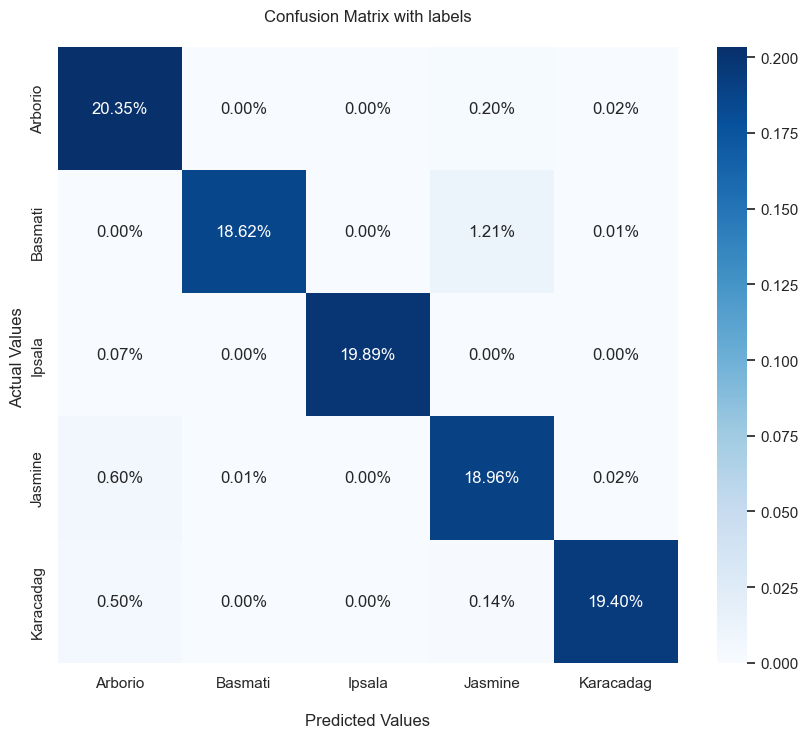

In [102]:
cm = confusion_matrix(y_true, y_pred)

plt.figure(figsize=(10,8))

ax = sns.heatmap(cm/np.sum(cm),fmt='.2%', annot=True, cmap='Blues')

ax.set_title('Confusion Matrix with labels\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

ax.xaxis.set_ticklabels(unique_labels)
ax.yaxis.set_ticklabels(unique_labels)

plt.show()

In [ ]:
## Predictions

In [103]:
def predict(images):
    pred = model.predict(images)
    pred = np.argmax(pred, axis=-1)
    pred = decode_labels(pred)
    return pred

In [104]:
print("Image batch shape:", image_batch.shape)
print("Predictions shape:", predictions.shape)


Image batch shape: (256, 50, 50, 3)
Predictions shape: (256, 5)


8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 


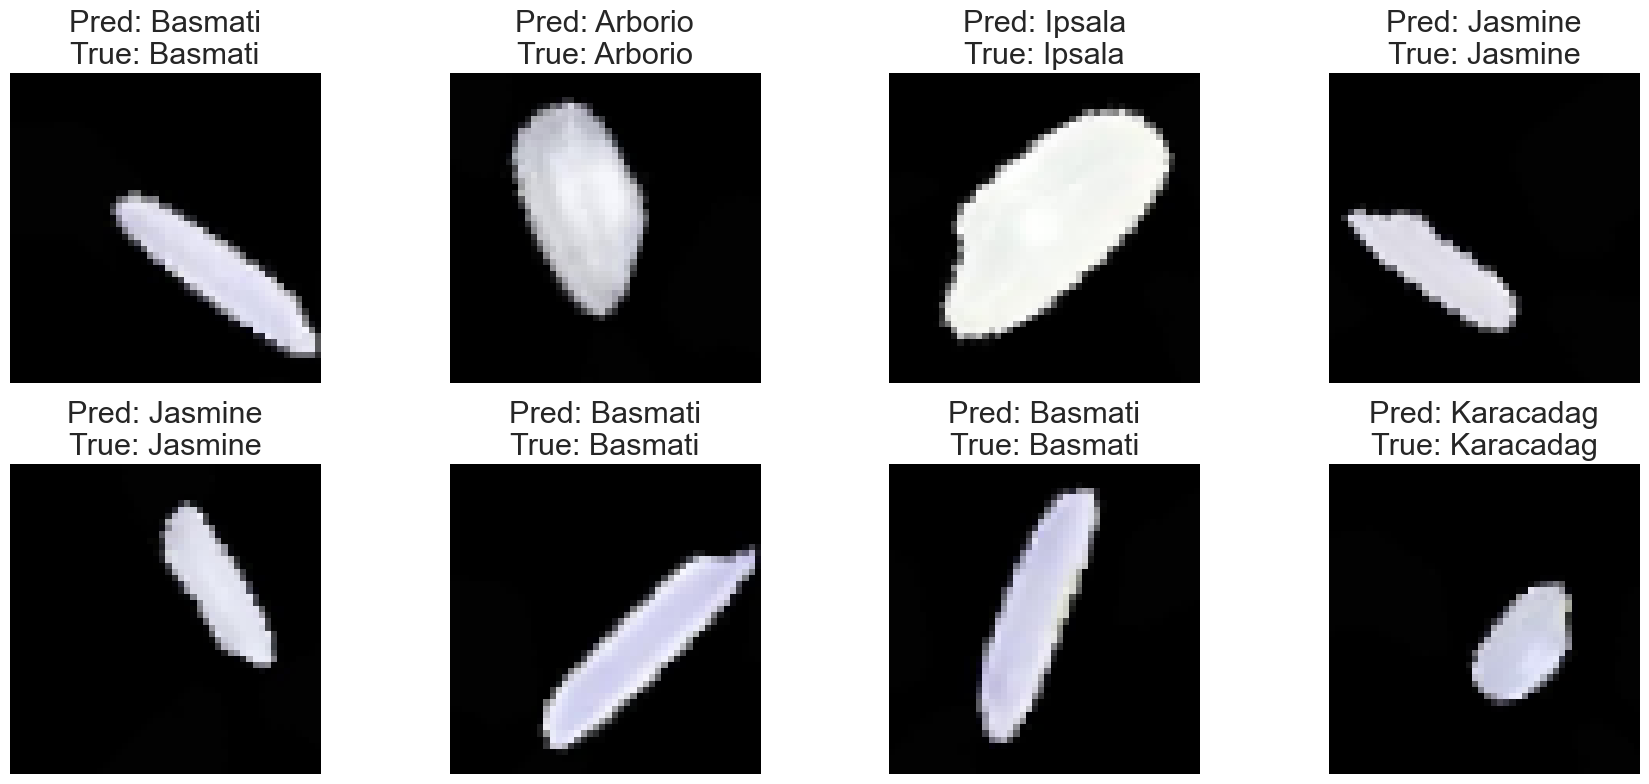

In [105]:
# Sample NUM_IMAGES from test_generator
NUM_IMAGES = 8
sample_indices = random.sample(range(len(test_generator)), NUM_IMAGES)

# Fetch a batch of images and labels
def fetch_batch(generator, indices):
    images = []
    labels = []
    for i in indices:
        x, y = generator[i]
        images.extend(x)
        labels.extend(y)
    return np.array(images), np.array(labels)

# Get a batch from the test_generator
image_batch, label_batch = fetch_batch(test_generator, sample_indices)

# Predict the classes
predictions = model.predict(image_batch)
predicted_classes = np.argmax(predictions, axis=-1)
true_classes = np.argmax(label_batch, axis=-1)

# Define class labels (Replace with your actual class labels)
class_labels = ["Arborio", "Basmati", "Ipsala", "Jasmine", "Karacadag"]

# Display images with labels
cols = 4
rows = 2
fig = plt.figure(figsize=(18, 8))

for i in range(NUM_IMAGES):
    ax = fig.add_subplot(rows, cols, i + 1)
    ax.imshow(image_batch[i])
    ax.axis('off')
    
    # Annotate predicted and actual labels on the image
    ax.set_title(f'Pred: {class_labels[predicted_classes[i]]}\nTrue: {class_labels[true_classes[i]]}', fontsize=22)

plt.tight_layout()
plt.show()